In [2]:
import numpy as np
import gurobipy as gp
import pandas as pd

### CSV DATA IS READ BELOW

<b> Please Note ROI_MAT is divided by 100 to maintain the uniformity with the previous file after reading it.</b>

In [3]:
#Read ROI data
roi_data=pd.read_csv('ROI_data.csv')
print('ROI DATA')
display(roi_data)

print('ROI Monthly Data')
roi_mat=pd.read_csv('roi_mat.csv', index_col=0)

#DIVIDING ROI_MAT by 100 to maintain uniformity with ROI_DATA
roi_mat=roi_mat/100
display(roi_mat)

ROI DATA


,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


ROI Monthly Data


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034
October,0.030,0.030,0.031,0.046,0.031,0.033,0.032,0.0230,0.025,0.032


#### Problem 3 : 
Formulate the marketing budget allocation problem as a linear program.  Use gurobi to find the optimal budget allocation.

In [4]:
obj = roi_data.iloc[0][1:].values #Maximize ROI
A = np.zeros((13,10))
A[0,:] = [1,1,1,1,1,1,1,1,1,1]      #Total sum of all money spent be less that or equal to 10 million USD (budget)
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Amount of money spent on print and TV be less than money spent on facebook and email
A[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total amount used in Social media atleast twice of SEO and adword 
A[3:,:] = np.diag(np.ones(10))      #Money spent on any medium be less than or equal to 3 million USD

b = np.array([10000000,0,0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])
sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<'])

Academic license - for non-commercial use only - expires 2022-09-24
Using license file C:\Users\safiu\gurobi.lic


,Amount (USD) - ROI estimate 1
Summary,
Total Budget or Investment,10000000.0
Optimized ROI,456000.0


,Budget Allocation - ROI ESTIMATE 1 - USD
Platform,
Print,0.0
TV,3000000.0
SEO,0.0
AdWords,1000000.0
Facebook,0.0
LinkedIn,0.0
Instagram,3000000.0
Snapchat,0.0
Twitter,0.0


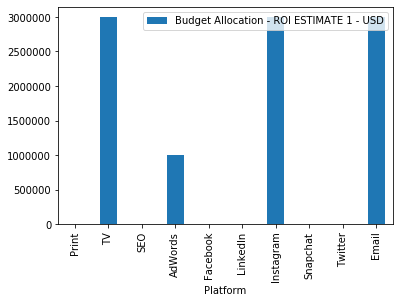

In [5]:
ojModel = gp.Model() 

ojModX = ojModel.addMVar(10) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.optimize()

maximum_profit_roi_1=ojModel.objVal

profit_table=pd.DataFrame()
profit_table['Summary'] = ['Total Budget or Investment','Optimized ROI']
profit_table['Amount (USD) - ROI estimate 1'] = [10000000,maximum_profit_roi_1]
profit_table=profit_table.set_index('Summary')


budget_allocation_df=pd.DataFrame()
budget_allocation_df['Platform']=roi_data.columns.values[1:]
budget_allocation_df['Budget Allocation - ROI ESTIMATE 1 - USD']=ojModX.x 
budget_allocation_df=budget_allocation_df.set_index('Platform')


display(profit_table)
display(budget_allocation_df)

budget_allocation_df.plot(kind='bar')


#### Problem 4 : 
Formulate the marketing budget allocation problem using the Second ROI

In [6]:
#Optimize using second ROI estimates
obj2 = roi_data.iloc[1][1:].values

In [7]:
A = np.zeros((13,10))
A[0,:] = [1,1,1,1,1,1,1,1,1,1]
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]
A[2,:] = [0,0,-2,-2,1,1,1,1,1,0]
A[3:,:] = np.diag(np.ones(10)) 
b = np.array([10000000,0,0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])
sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<'])

,Amount (USD) - ROI estimate 1,Amount (USD) - ROI estimate 2
Summary,,
Total Budget or Investment,10000000.0,10000000.0
Optimized ROI,456000.0,456000.0


,Budget Allocation - ROI ESTIMATE 1 - USD,Budget Allocation - ROI ESTIMATE 2 - USD
Platform,,
Print,0.0,3000000.0
TV,3000000.0,0.0
SEO,0.0,0.0
AdWords,1000000.0,1000000.0
Facebook,0.0,3000000.0
LinkedIn,0.0,3000000.0
Instagram,3000000.0,0.0
Snapchat,0.0,0.0
Twitter,0.0,0.0


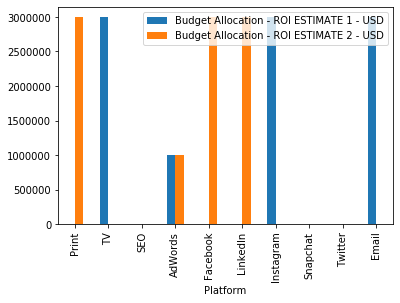

In [8]:
ojModel = gp.Model() 

ojModX = ojModel.addMVar(10) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.optimize()

maximum_profit_roi_2=ojModel.objVal


profit_table['Amount (USD) - ROI estimate 2'] = [10000000,ojModel.objVal]
budget_allocation_df['Budget Allocation - ROI ESTIMATE 2 - USD']=ojModX.x 

display(profit_table)
display(budget_allocation_df)

budget_allocation_df.plot(kind='bar')

#### Problem 5

In [9]:
roi1_alloca2=maximum_profit_roi_1-sum(obj*budget_allocation_df['Budget Allocation - ROI ESTIMATE 2 - USD'])
roi2_alloca1=maximum_profit_roi_2-sum(obj2*budget_allocation_df['Budget Allocation - ROI ESTIMATE 1 - USD'])

print('Case 1 : Change in Objective(Maximum ROI) is : ' ,roi1_alloca2 )
print('Case 2 : Change in Objective(Maximum ROI) is : ' ,roi2_alloca1 )

#Running Optimization without the third constraint(#Money spent on any medium be less than or equal to 3 million USD)
A = np.zeros((3,10))
A[0,:] = [1,1,1,1,1,1,1,1,1,1]
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]
A[2,:] = [0,0,-2,-2,1,1,1,1,1,0]
b = np.array([10000000,0,0])
sense = np.array(['<','<','>'])

ojModel = gp.Model() 

ojModX = ojModel.addMVar(10) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.optimize()


budget_allocation_new_df=pd.DataFrame()
budget_allocation_new_df['Platform']=roi_data.columns.values[1:]
budget_allocation_new_df['Budget Allocation (1)']=ojModX.x 
budget_allocation_new_df=budget_allocation_new_df.set_index('Platform')

ojModel = gp.Model() 

ojModX = ojModel.addMVar(10) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.optimize()

budget_allocation_new_df['Budget Allocation (2)']=ojModX.x 

display(budget_allocation_new_df)

print('Maximum profit returned is more without the constraint. ' , ojModel.objVal , ' USD' )
print('This is more than the ROI gained with the third constraint ', maximum_profit_roi_1, ' and ' , maximum_profit_roi_2, ' by ',ojModel.objVal-maximum_profit_roi_2 , ' USD ' )
print('  ')
print('Summary : ')
print('Profit is maximised without the constraint. However, As we can see the budget allocation for media spends is split in only in   two media. Adding a constraint maybe a method to avoid putting all the eggs only in two baskets.')

Case 1 : Change in Objective(Maximum ROI) is :  204000.0
Case 2 : Change in Objective(Maximum ROI) is :  192000.0


,Budget Allocation (1),Budget Allocation (2)
Platform,,
Print,0.0,5000000.0
TV,5000000.0,0.0
SEO,0.0,0.0
AdWords,0.0,0.0
Facebook,0.0,5000000.0
LinkedIn,0.0,0.0
Instagram,0.0,0.0
Snapchat,0.0,0.0
Twitter,0.0,0.0


Maximum profit returned is more without the constraint.  465000.0  USD
This is more than the ROI gained with the third constraint  456000.0  and  456000.0  by  9000.0  USD 
  
Summary : 
Profit is maximised without the constraint. However, As we can see the budget allocation for media spends is split in only in   two media. Adding a constraint maybe a method to avoid putting all the eggs only in two baskets.


#### Problem 6
To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data.  Use the first ROI data as your starting point.  By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [10]:

#Making sure the problem is using the correct constraints and ROI estimates
A = np.zeros((13,10))
A[0,:] = [1,1,1,1,1,1,1,1,1,1]      #Total sum of all money spent be less that or equal to 10 million USD (budget)
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Amount of money spent on print and TV be less than money spent on facebook and email
A[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total amount used in Social media atleast twice of SEO and adword 
A[3:,:] = np.diag(np.ones(10))      #Money spent on any medium be less than or equal to 3 million USD

b = np.array([10000000,0,0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])
sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<'])

ojModel = gp.Model() 

ojModX = ojModel.addMVar(10) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.optimize()


optimal_allocation_range=pd.DataFrame()
optimal_allocation_range['Platform']=roi_data.columns.values[1:]
optimal_allocation_range['Minimum Val']=ojModX.SAObjLow
optimal_allocation_range['Maximum Val']=ojModX.SAObjUp
optimal_allocation_range['Current Value']= roi_data.iloc[0][1:].values 
optimal_allocation_range=optimal_allocation_range.set_index('Platform')

print('To maintain the same optimal allocation the ranges for each platform is as follows : ')
display(optimal_allocation_range)


To maintain the same optimal allocation the ranges for each platform is as follows : 


,Minimum Val,Maximum Val,Current Value
Platform,,,
Print,-inf,0.049,0.031
TV,0.039,0.062,0.049
SEO,-inf,0.039,0.024
AdWords,0.033,0.046,0.039
Facebook,-inf,0.029,0.016
LinkedIn,-inf,0.039,0.024
Instagram,0.039,inf,0.046
Snapchat,-inf,0.039,0.026
Twitter,-inf,0.039,0.033


#### Problem 7
Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M.  The monthly ROI for next year is given in Project1.Rdata. The three constraints given by your boss are still in place for each month.  What is the optimal allocation for each month?

In [12]:
#Making sure the problem is using the correct constraints and ROI estimates
A = np.zeros((13,10))
A[0,:] = [1,1,1,1,1,1,1,1,1,1]      #Total sum of all money spent be less that or equal to 10 million USD (budget)
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Amount of money spent on print and TV be less than money spent on facebook and email
A[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total amount used in Social media atleast twice of SEO and adword 
A[3:,:] = np.diag(np.ones(10))      #Money spent on any medium be less than or equal to 3 million USD

sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<'])

#Summary
sumary_df=pd.DataFrame()
months=roi_mat.index.values

obj = roi_data.iloc[0][1:].values 

availaible_budget=10000000
    
avl_inve=[]
roi=[]

#Recalculate Budget Avalaible for each month
for month_index in range(len(roi_mat)):

    avl_inve.append(availaible_budget)
    b = np.array([availaible_budget,0,0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])

    ojModel = gp.Model() 
    ojModX = ojModel.addMVar(10) 
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

    ojModel.Params.OutputFlag = 0 
    ojModel.optimize()

    #Calculate ROI of the month using dot product
    ROI_month=roi_mat.iloc[month_index].values@ojModX.x
    
    
    budget_allocation = ojModX.x.tolist()
    budget_allocation.append(ROI_month)
    budget_allocation.append(availaible_budget)
    
    sumary_df[months[month_index]]=budget_allocation
    
 
    #Update Availaible Budget :
    availaible_budget=availaible_budget+(0.5*(ROI_month))
    roi.append(ROI_month)
    
sumary_df=sumary_df/10**6

ind = roi_data.columns.values[1:].tolist()
ind.append('ROI')
ind.append('Availaible_Budget')
sumary_df=sumary_df.set_index([pd.Index(ind)])

display(sumary_df.T)

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,ROI,Availaible_Budget
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.000000,3.0,0.360000,10.000000
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.000000,3.0,0.347840,10.180000
March,0.0,3.0,0.0,1.353920,0.0,0.0,3.0,0.0,0.000000,3.0,0.324449,10.353920
April,0.0,3.0,0.0,1.505381,0.0,0.0,3.0,0.0,0.010763,3.0,0.357624,10.516144
May,0.0,3.0,0.0,1.564986,0.0,0.0,3.0,0.0,0.129971,3.0,0.389058,10.694957
June,0.0,3.0,0.0,1.629829,0.0,0.0,3.0,0.0,0.259657,3.0,0.419281,10.889486
July,0.0,3.0,0.0,1.699709,0.0,0.0,3.0,0.0,0.399418,3.0,0.441764,11.099126
August,0.0,3.0,0.0,1.773336,0.0,0.0,3.0,0.0,0.546672,3.0,0.434534,11.320008
September,0.0,3.0,0.0,1.845758,0.0,0.0,3.0,0.0,0.691517,3.0,0.375183,11.537275
October,0.0,3.0,0.0,1.908289,0.0,0.0,3.0,0.0,0.816578,3.0,0.390196,11.724866


8)	A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model.  Describe how my might model this?

In [13]:
df=sumary_df.T
df_shift = sumary_df.T.apply(lambda x: x.shift(1))
df_shift.loc['January'] = 0

tempdf=df_shift-df
tempdf=tempdf[1:]
tempdf.drop(columns=['ROI','Availaible_Budget'] , inplace=True)
stable_check=tempdf.applymap(lambda x : abs(x)>=1)

check=stable_check.eq(True).all().eq(True).all()

budget=''

if not check : 
    budget= 'Stable'
else:
    budget='Unstable'
    
print('The Budget is ' +  budget )

The Budget is Stable
